In [1]:
import pandas as pd
import glob
import json

def extract_model_persona_from_fname(fname):
    # e.g. asteroids_a2c_asteroids_hunter_novice_eval.json
    # pattern for model: after first '_' and before next '_'
    # pattern for persona: after model and next '_', or the next
    parts = fname.lower().split('_')
    model = None
    persona = None
    for i, p in enumerate(parts):
        if p in ('a2c', 'ppo'):
            model = p
            if i+2 < len(parts):
                persona = parts[i+2]
            break
    return model, persona

all_rows = []
for fname in glob.glob('../models/*.json'):
#for fname in glob.glob('*.json'):
    model, persona = extract_model_persona_from_fname(fname)
    with open(fname) as f:
        data = json.load(f)
        if isinstance(data, list):
            for row in data:
                row['file'] = fname
                row['model'] = model
                row['persona'] = persona
                all_rows.append(row)
        elif isinstance(data, dict):
            num_eps = len(data['scores'])
            for i in range(num_eps):
                row = {'file': fname, 'model': model, 'persona': persona}
                for key in data:
                    if isinstance(data[key], list):
                        row[key] = data[key][i]
                    else:
                        row[key] = data[key]
                all_rows.append(row)

all_df = pd.DataFrame(all_rows)



In [2]:
import numpy as np

def extract_scalar(val):
    if isinstance(val, (list, np.ndarray)) and len(val) == 1:
        return val[0]
    elif isinstance(val, (list, np.ndarray)):
        # Take the first element, or handle as needed
        return val[0]
    else:
        return val

all_df['episode_rewards'] = all_df['episode_rewards'].apply(extract_scalar).astype(float)
all_df['episode_steps'] = all_df['episode_steps'].apply(extract_scalar).astype(float)
all_df['scores'] = all_df['scores'].apply(extract_scalar).astype(float)

all_df


,episodes,episode_steps,scores,levels,bullets_fired,asteroids_destroyed,episode_accuracy,episode_score_per_min,episode_reward_per_min,episode_score_reward_ratio,...,mean_distances,deaths_by,episode_rewards,episode_max_reward,episode_min_reward,episode_mean_reward,reward_rates,file,model,persona
0,1,1388.0,5400.0,[3],[117],[76],[0.6495726495726496],[233.42939481268013],[60.0],[3.8904899135446684],...,[167.58869010247926],[collision],1388.0,[1.0],[1.0],[1.0],[1.0],../models\asteroids_a2c_asteroids_hunter_exper...,a2c,hunter
1,1,1536.0,6500.0,[3],[120],[89],[0.7416666666666667],[253.90625],[60.0],[4.231770833333333],...,[168.07311171285184],[collision],1536.0,[1.0],[1.0],[1.0],[1.0],../models\asteroids_a2c_asteroids_hunter_exper...,a2c,hunter
2,1,1039.0,3780.0,[2],[85],[52],[0.611764705882353],[218.28681424446583],[60.0],[3.638113570741097],...,[168.14838678483108],[collision],1039.0,[1.0],[1.0],[1.0],[1.0],../models\asteroids_a2c_asteroids_hunter_exper...,a2c,hunter
3,1,846.0,2930.0,[2],[77],[42],[0.5454545454545454],[207.80141843971631],[60.0],[3.4633569739952716],...,[160.04063232822392],[collision],846.0,[1.0],[1.0],[1.0],[1.0],../models\asteroids_a2c_asteroids_hunter_exper...,a2c,hunter
4,1,2021.0,7000.0,[3],[162],[94],[0.5802469135802469],[207.81791192478974],[60.00000000000001],[3.463631865413162],...,[155.32446242993322],[collision],2021.0,[1.0],[1.0],[1.0],[1.0],../models\asteroids_a2c_asteroids_hunter_exper...,a2c,hunter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,748.0,1780.0,[1],[35],[25],[0.7142857142857143],[142.7807486631016],[60.0],[2.379679144385027],...,[158.71155240859719],[collision],748.0,[1.0],[1.0],[1.0],[1.0],../models\asteroids_ppo_asteroids_survivor_exp...,ppo,survivor
596,1,1250.0,4880.0,[3],[95],[63],[0.6631578947368421],[234.24],[60.0],[3.904],...,[174.50880788918576],[collision],1250.0,[1.0],[1.0],[1.0],[1.0],../models\asteroids_ppo_asteroids_survivor_exp...,ppo,survivor
597,1,763.0,3580.0,[2],[56],[49],[0.875],[281.5203145478375],[60.0],[4.692005242463958],...,[154.66901449699077],[collision],763.0,[1.0],[1.0],[1.0],[1.0],../models\asteroids_ppo_asteroids_survivor_exp...,ppo,survivor
598,1,908.0,2710.0,[2],[57],[39],[0.6842105263157895],[179.07488986784142],[60.0],[2.984581497797357],...,[173.53641339230626],[collision],908.0,[1.0],[1.0],[1.0],[1.0],../models\asteroids_ppo_asteroids_survivor_exp...,ppo,survivor


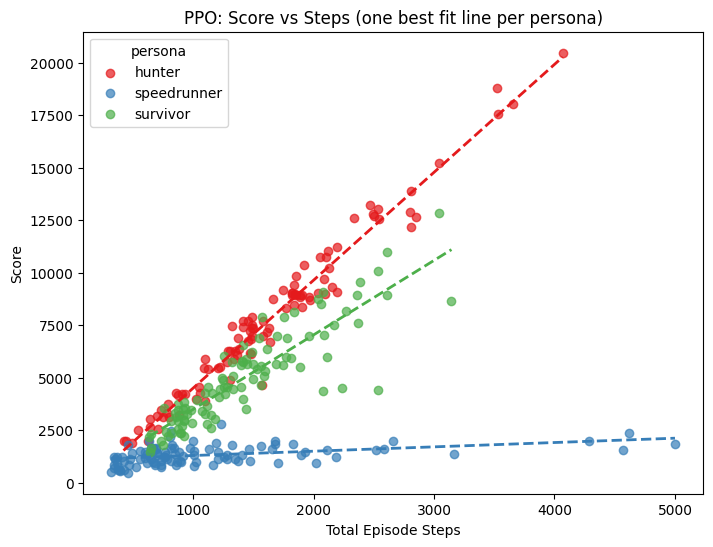

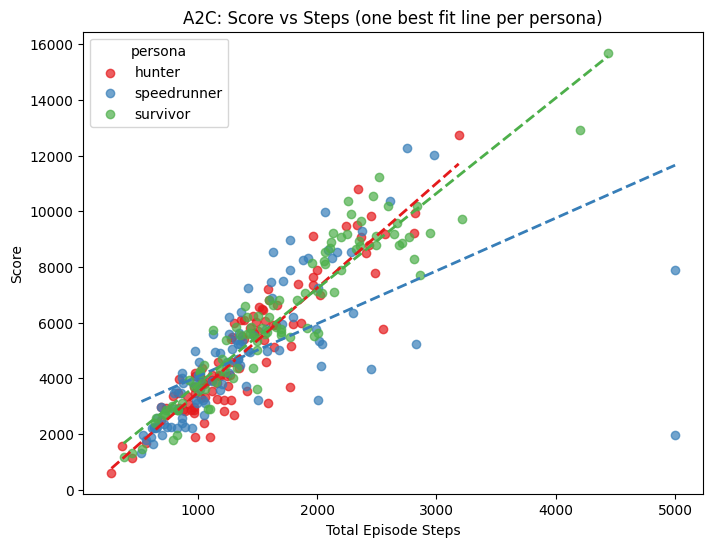

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define a color palette for personas
persona_palette = [
    '#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00',
    '#a65628', '#f781bf', '#999999', '#dede00', '#000000'
]
persona_list = list(all_df['persona'].unique())
persona_color_map = {persona: persona_palette[i % len(persona_palette)] for i, persona in enumerate(persona_list)}

# -- 1. PPO only: color by persona, best fit per persona --
plt.figure(figsize=(8,6))
df = all_df[all_df['model'] == 'ppo']
for persona in df['persona'].unique():
    mask = (df['persona'] == persona)
    x = df.loc[mask, 'episode_steps']
    y = df.loc[mask, 'scores']
    plt.scatter(
        x, y,
        color=persona_color_map[persona],
        marker='o',
        label=persona,
        alpha=0.7
    )
    if len(x) > 1:
        m, b = np.polyfit(x, y, 1)
        plt.plot(
            np.sort(x),
            m * np.sort(x) + b,
            color=persona_color_map[persona],
            linestyle='--',
            linewidth=2
        )
plt.legend(title='persona')
plt.title('PPO: Score vs Steps (one best fit line per persona)')
plt.xlabel('Total Episode Steps')
plt.ylabel('Score')
plt.show()

# -- 2. A2C only: color by persona, best fit per persona --
plt.figure(figsize=(8,6))
df = all_df[all_df['model'] == 'a2c']
for persona in df['persona'].unique():
    mask = (df['persona'] == persona)
    x = df.loc[mask, 'episode_steps']
    y = df.loc[mask, 'scores']
    plt.scatter(
        x, y,
        color=persona_color_map[persona],
        marker='o',
        label=persona,
        alpha=0.7
    )
    if len(x) > 1:
        m, b = np.polyfit(x, y, 1)
        plt.plot(
            np.sort(x),
            m * np.sort(x) + b,
            color=persona_color_map[persona],
            linestyle='--',
            linewidth=2
        )
plt.legend(title='persona')
plt.title('A2C: Score vs Steps (one best fit line per persona)')
plt.xlabel('Total Episode Steps')
plt.ylabel('Score')
plt.show()


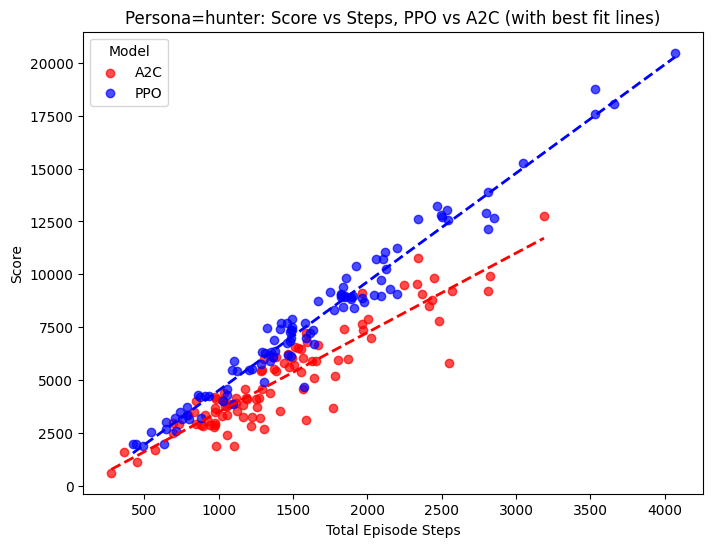

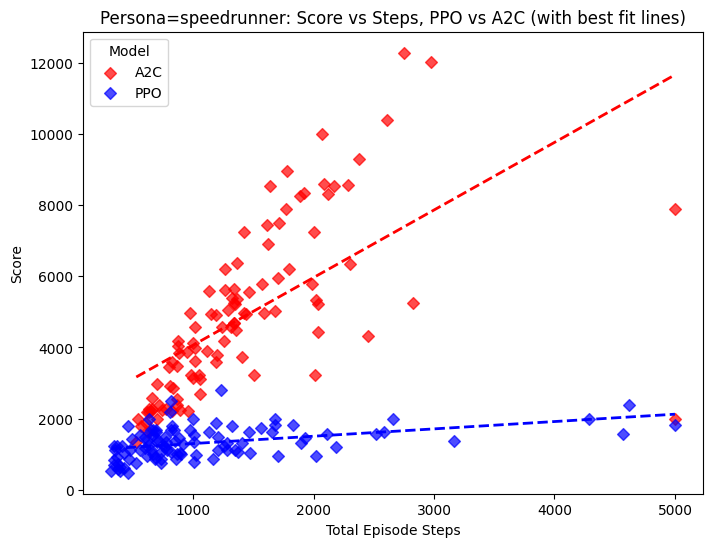

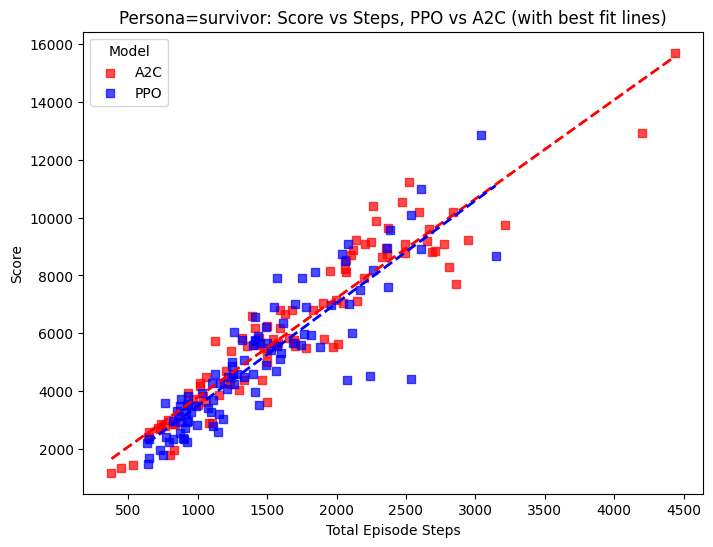

In [4]:
import numpy as np
import matplotlib.pyplot as plt

model_colors = {'a2c': 'red', 'ppo': 'blue'}
persona_markers = {
    'hunter': 'o',
    'survivor': 's',
    'baseline': '^',
    'speedrunner': 'D',
    'simple': 'v'
}

for persona in all_df['persona'].unique():
    plt.figure(figsize=(8,6))
    df = all_df[all_df['persona'] == persona]
    for model in df['model'].unique():
        mask = (df['model'] == model)
        x = df.loc[mask, 'episode_steps']
        y = df.loc[mask, 'scores']
        plt.scatter(
            x, y,
            color=model_colors.get(model, 'gray'),
            marker=persona_markers.get(persona, 'o'),
            label=model.upper(),
            alpha=0.7
        )
        # line of best fit for this model
        if len(x) > 1:
            m, b = np.polyfit(x, y, 1)
            plt.plot(
                np.sort(x),
                m * np.sort(x) + b,
                color=model_colors.get(model, 'gray'),
                linestyle='--',
                linewidth=2
            )
    plt.legend(title='Model')
    plt.title(f'Persona={persona}: Score vs Steps, PPO vs A2C (with best fit lines)')
    plt.xlabel('Total Episode Steps')
    plt.ylabel('Score')
    plt.show()


In [5]:
def extract_scalar(val):
    # If a list/array, take the first value; else return as is
    if isinstance(val, (list, np.ndarray)):
        return val[0] if len(val) else np.nan
    return val

# Apply to your DataFrame, e.g.
all_df['episode_steps'] = all_df['episode_steps'].apply(extract_scalar)
all_df['scores'] = all_df['scores'].apply(extract_scalar)
all_df['episode_rewards'] = all_df['episode_rewards'].apply(extract_scalar)


C:\Users\kevin\AppData\Local\Temp\ipykernel_34452\2561466772.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\kevin\AppData\Local\Temp\ipykernel_34452\2561466772.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


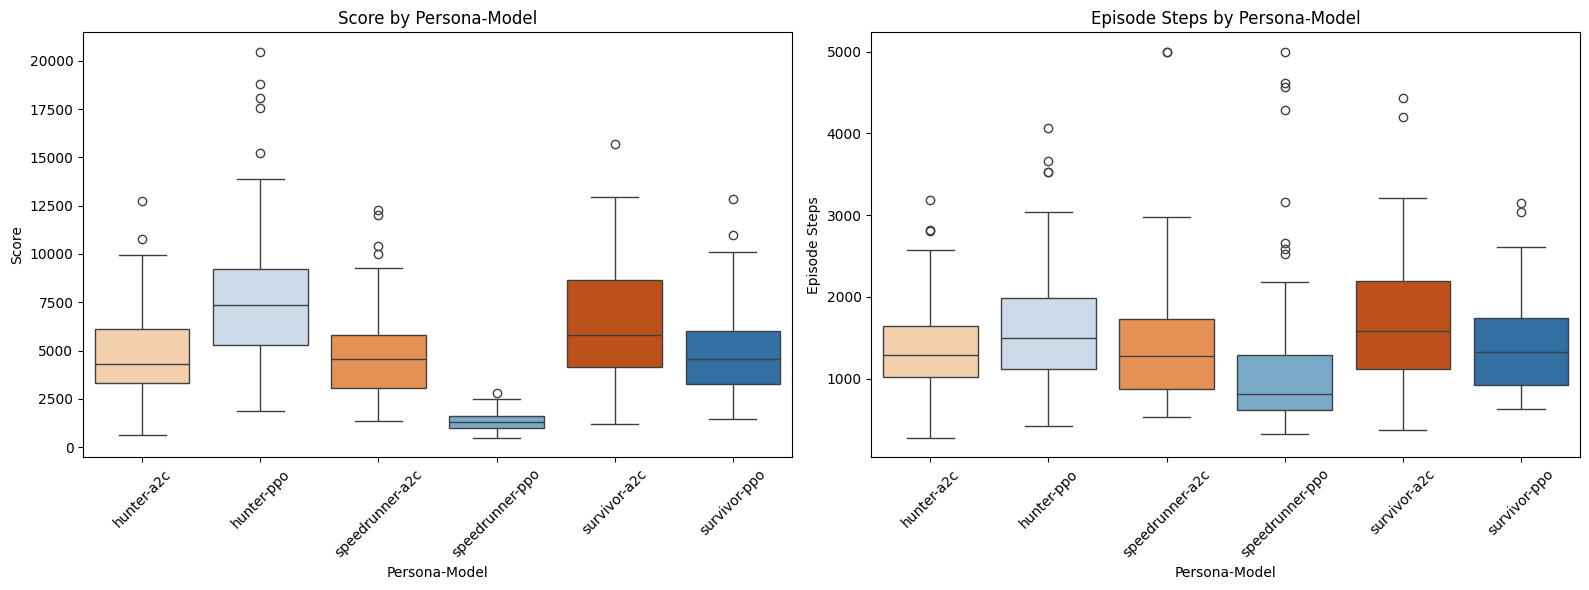

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the data
def flatten_if_list(val):
    if isinstance(val, list) and len(val):
        return val[0]
    return val

df_plot = all_df.copy()
df_plot['score'] = df_plot['scores'].apply(flatten_if_list)
df_plot['episode_steps_flat'] = df_plot['episode_steps'].apply(flatten_if_list)
df_plot['group'] = df_plot['persona'] + '-' + df_plot['model']

# Set up color palette
groups = sorted(df_plot['group'].unique())
ppo_groups = [g for g in groups if 'ppo' in g]
a2c_groups = [g for g in groups if 'a2c' in g]
palette = {}
ppo_colors = sns.color_palette("Blues", len(ppo_groups))
a2c_colors = sns.color_palette("Oranges", len(a2c_groups))
for g, c in zip(ppo_groups, ppo_colors):
    palette[g] = c
for g, c in zip(a2c_groups, a2c_colors):
    palette[g] = c

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
metrics = [('score', 'Score'), ('episode_steps_flat', 'Episode Steps')]

for ax, (col, label) in zip(axes, metrics):
    sns.boxplot(
        data=df_plot,
        x='group',
        y=col,
        order=groups,
        palette=palette,
        ax=ax,
        showfliers=True
    )
    ax.set_title(label + " by Persona-Model")
    ax.set_xlabel("Persona-Model")
    ax.set_ylabel(label)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.tight_layout()
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_34452\1221686071.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\kevin\AppData\Local\Temp\ipykernel_34452\1221686071.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\kevin\AppData\Local\Temp\ipykernel_34452\1221686071.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


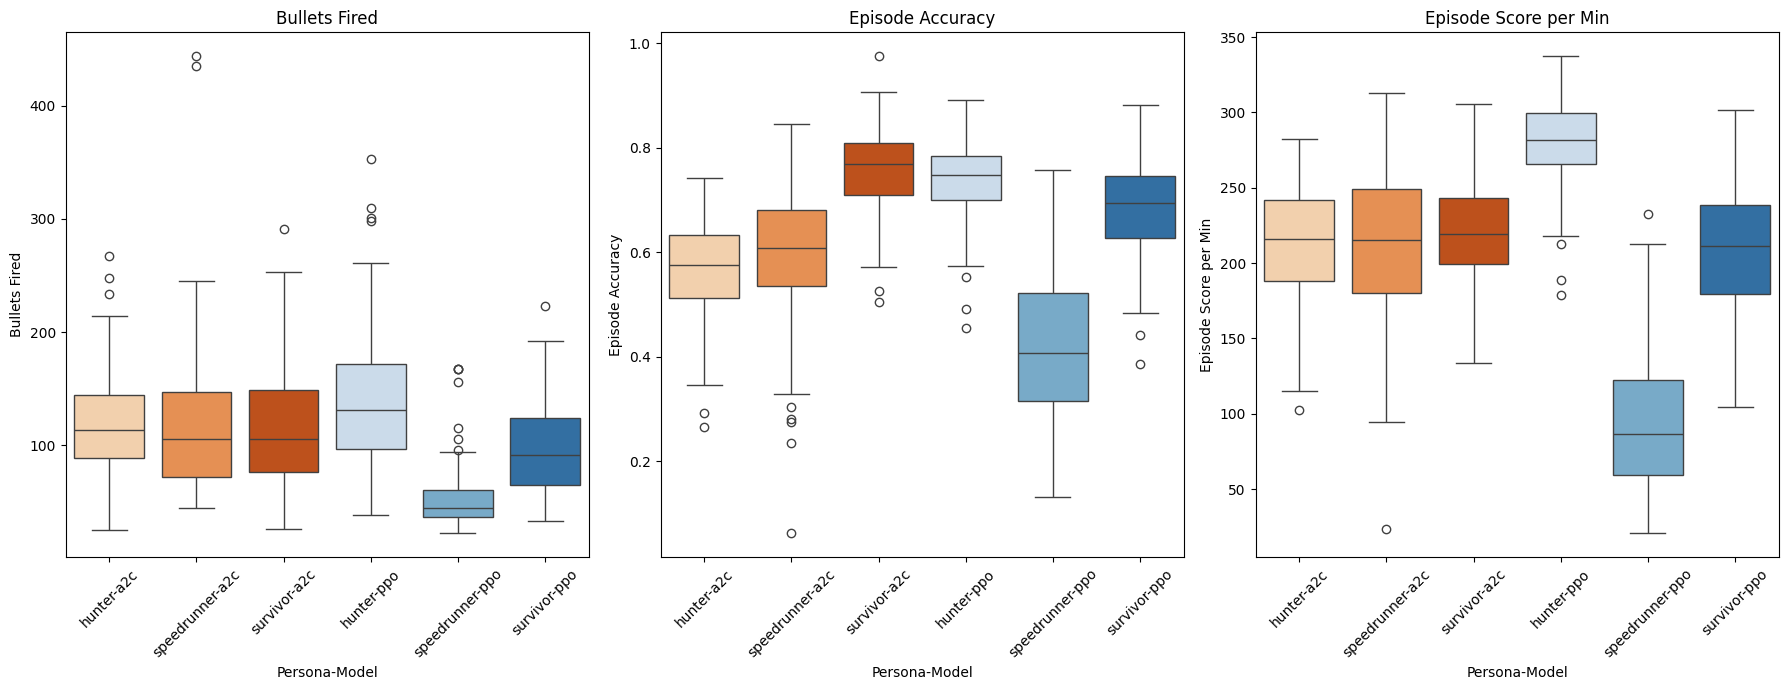

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def flatten_if_list(val):
    if isinstance(val, list) and len(val):
        return val[0]
    return val

df_plot = all_df.copy()
for col in ['episode_accuracy', 'episode_score_per_min', 'bullets_fired']:
    df_plot[col] = df_plot[col].apply(flatten_if_list)

# Generate group labels and palettes
df_plot['group'] = df_plot['persona'] + '-' + df_plot['model']
groups = df_plot['group'].unique()
ppo_groups = [g for g in groups if 'ppo' in g]
a2c_groups = [g for g in groups if 'a2c' in g]

palette = {}
ppo_colors = sns.color_palette("Blues", len(ppo_groups))
a2c_colors = sns.color_palette("Oranges", len(a2c_groups))

for g, c in zip(ppo_groups, ppo_colors):
    palette[g] = c
for g, c in zip(a2c_groups, a2c_colors):
    palette[g] = c

metrics = [
    ('bullets_fired', 'Bullets Fired'),            # Left
    ('episode_accuracy', 'Episode Accuracy'),      # Middle
    ('episode_score_per_min', 'Episode Score per Min')  # Right
]

fig, axes = plt.subplots(1, 3, figsize=(18,7))

for ax, (col, title) in zip(axes, metrics):
    sns.boxplot(
        data=df_plot,
        x='group',
        y=col,
        order=groups,
        palette=palette,    # palette keyed by 'group'
        ax=ax,
        showfliers=True
    )
    ax.set_title(title)
    ax.set_xlabel("Persona-Model")
    ax.set_ylabel(title)
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

